## Modeling Height of Kalahari Foragers

In this notebook, we use the PyMC3 package to create samples from the posterior distribution. The model is: 
$$
\begin{align*}
    h_i & \overset{\text{iid}}{\sim} N(\mu, \sigma) \\
    \mu & \sim N(178, 20) \\
    \sigma & \sim \text{Uniform}(0, 50)
\end{align*}
$$

In order to estimate the most plausible values of $\mu$ and $\sigma$, we use Bayes' Theorem which in this context can be written as:
$$
\begin{align*}
    \text{Pr} \{ \mu, \sigma \vert h_1, \ldots, h_n \} 
        & = \frac{\prod_{i = 1}^n \text{Pr} \{h_i \vert \mu, \sigma \} \cdot \text{Pr} \{ \mu \} \cdot \text{Pr} \{ \sigma \}}{\int \int \prod_{i = 1}^n \text{Pr} \{h_i \vert \mu, \sigma \} \cdot \text{Pr} \{ \mu \} \cdot \text{Pr} \{ \sigma \} d \mu d \sigma},
\end{align*}
$$
where $\text{Pr} \{ \mu \} = N(\mu \vert 178, 20)$ and $\text{Pr} \{ \sigma \} = \text{Uniform} (\sigma \vert (0, 50))$.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

az.style.use("arviz-darkgrid")


HOWELL1_DATA_LOCATION = '../../data/howell1.csv' 

In [2]:
df = pd.read_csv(HOWELL1_DATA_LOCATION)
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [3]:
df_adults = df[df['age'] >= 18]

### Specifying a Model in PyMC3

$$
\begin{align*}
    h_i & \overset{\text{iid}}{\sim} N(\mu, \sigma) \\
    \mu & \sim N(178, 20) \\
    \sigma & \sim \text{Uniform}(0, 50)
\end{align*}
$$

### Code 4.27

In [4]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=df_adults['height'])

### Code 4.28

In [5]:
with m4_1:
    trace4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

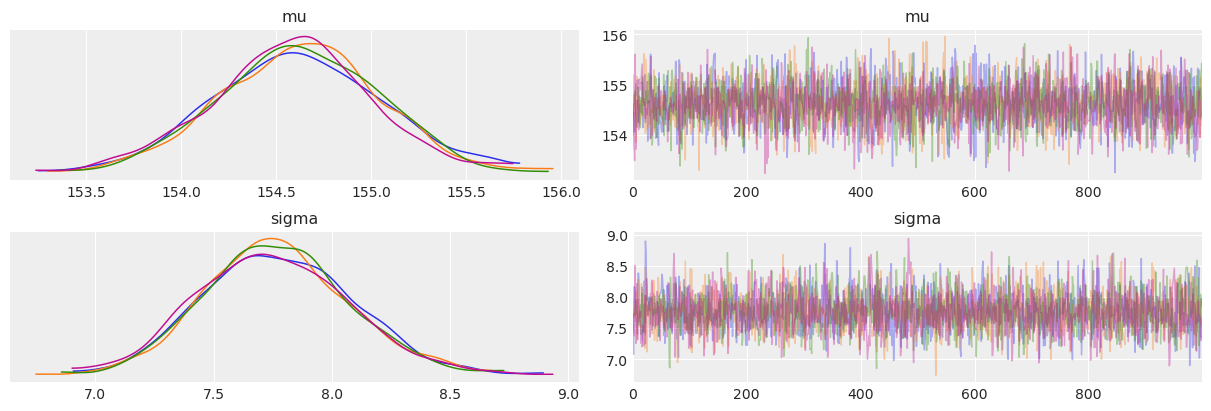

In [6]:
az.plot_trace(trace4_1)

### Summary of Posterior Distribution

### Code 4.29

In [7]:
az.summary(trace4_1, hdi_prob=0.89)

/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,154.609,0.427,153.947,155.307,0.008,0.005,3103.0,3103.0,3089.0,2793.0,1.0
sigma,7.766,0.311,7.284,8.260,0.006,0.004,3148.0,3127.0,3186.0,2569.0,1.0


### Good Starting Values of $\mu$ and $\sigma$

### Code 4.30

In [8]:
mean_ht = df_adults['height'].mean()
sd_ht = df_adults['height'].std()

with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=mean_ht)
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=sd_ht)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=df_adults['height'])
    
    trace4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

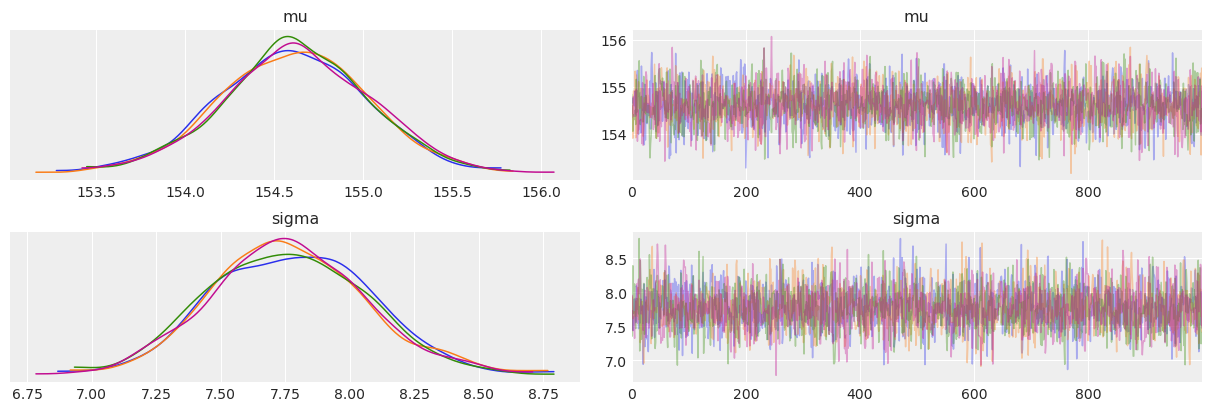

In [9]:
az.plot_trace(trace4_1)

In [10]:
az.summary(trace4_1, hdi_prob=0.89)

/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,154.612,0.412,154.003,155.318,0.007,0.005,3696.0,3695.0,3683.0,2782.0,1.0
sigma,7.766,0.303,7.262,8.224,0.005,0.004,3444.0,3443.0,3453.0,2678.0,1.0


### Using More Informative Priors

$$
\begin{align*}
    h_i & \overset{\text{iid}}{\sim} N(\mu, \sigma) \\
    \mu & \sim N(178, 0.1) \\
    \sigma & \sim \text{Uniform}(0, 50)
\end{align*}
$$

### Code 4.31

In [11]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1, testval=mean_ht)
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=sd_ht)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=df_adults['height'])
    
    trace4_2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

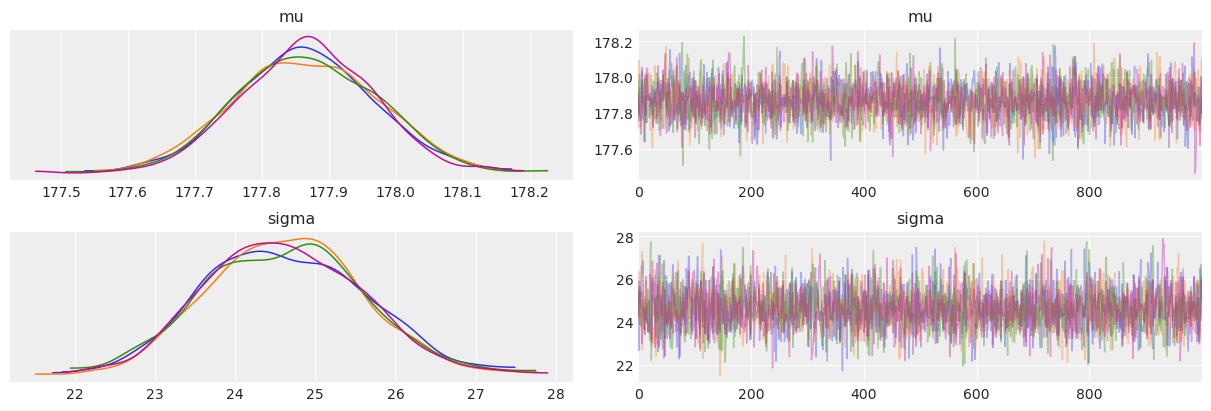

In [12]:
az.plot_trace(trace4_2)

In [13]:
az.summary(trace4_2, hdi_prob=0.89)

/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,177.866,0.104,177.698,178.024,0.002,0.001,3472.0,3471.0,3477.0,2770.0,1.0
sigma,24.619,0.977,23.133,26.202,0.016,0.012,3571.0,3549.0,3584.0,2859.0,1.0


### Comment from book

Notice that the estimate for $\mu$ has hardly moved off the prior. The prior was very concentrated around $178$. So this is not surprising. But also notice that the estimate for $\sigma$ has changed quite a lot, even though we didn’t change its prior at all. Once the golem is certain that the mean is near $178$—as the prior insists—then the golem has to estimate $\sigma$ conditional on that fact. This results in a different posterior for $\sigma$, even though all we changed is prior information about the other parameter.

### Matrix of Covariances

Before we can examine the matrix of covariances, it has been suggested to first convert the trace to a dataframe.

In [14]:
trace4_1_df = pm.trace_to_dataframe(trace4_1)
trace4_1_df.head()

,mu,sigma
0,154.657876,7.730717
1,154.657876,7.730717
2,154.762517,7.445343
3,154.762517,7.445343
4,154.602455,7.901927


### Code 4.32

In [15]:
trace4_1_df.cov()

,mu,sigma
mu,0.169392,-0.003906
sigma,-0.003906,0.091795


### Code 4.33

In [16]:
np.diag(trace4_1_df.cov())

array([0.1693919 , 0.09179476])

In [17]:
trace4_1_df.corr()

,mu,sigma
mu,1.000000,-0.031324
sigma,-0.031324,1.000000


### Code 4.34 and 4.35

Since we already generated samples, and moved them into a dataframe, we could display them if we wish by simply calling:

In [18]:
trace4_1_df.head()

,mu,sigma
0,154.657876,7.730717
1,154.657876,7.730717
2,154.762517,7.445343
3,154.762517,7.445343
4,154.602455,7.901927


In [19]:
trace4_1_df.describe()

,mu,sigma
count,4000.000000,4000.000000
mean,154.611577,7.765959
std,0.411572,0.302977
min,153.157240,6.781946
25%,154.341283,7.553579
50%,154.609408,7.757162
75%,154.891530,7.972112
max,156.076096,8.793118


### Density Plots

### Joint Density

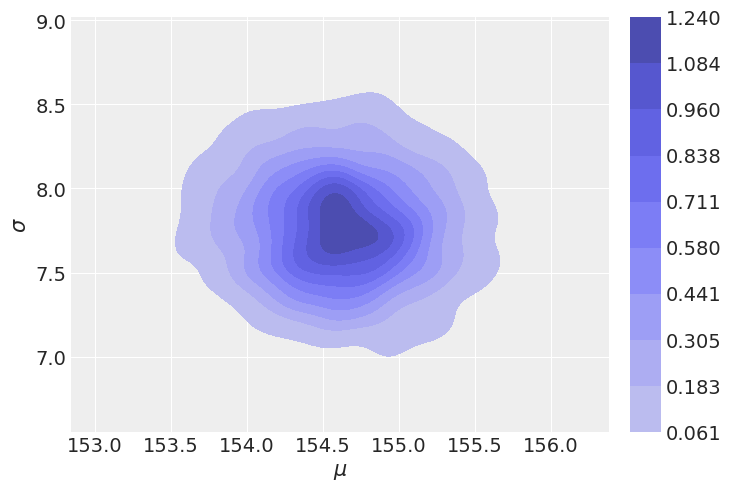

In [20]:
import seaborn as sns


sns.kdeplot(x=trace4_1_df['mu'], y=trace4_1_df['sigma'], cbar=True, fill=True)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()

### Marginal Densitities

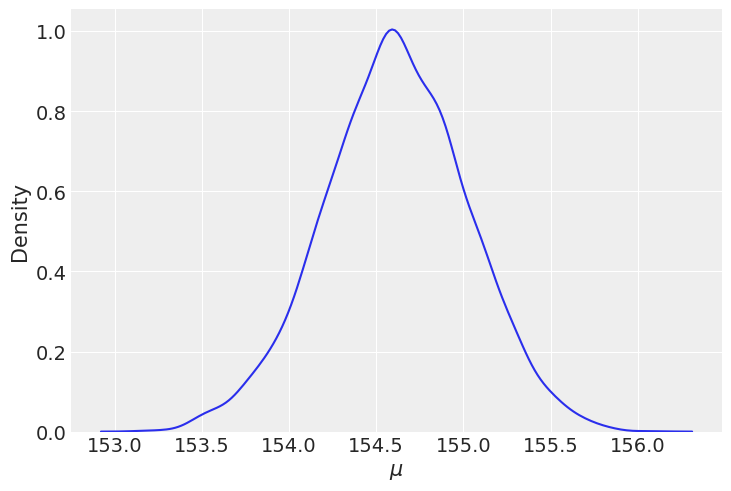

In [21]:
sns.kdeplot(x=trace4_1_df['mu'])

plt.xlabel(r'$\mu$')
plt.show()

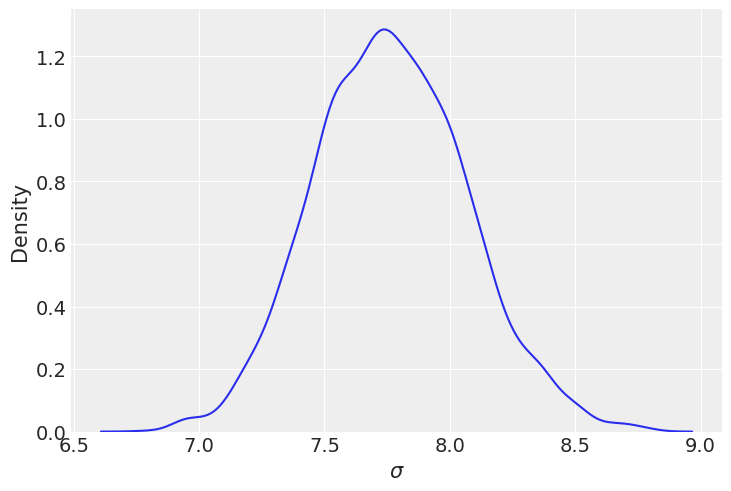

In [22]:
sns.kdeplot(x=trace4_1_df['sigma'])

plt.xlabel(r'$\sigma$')
plt.show()